In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy
from scipy import stats


#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.display import display_html
%matplotlib inline
sns.set(style="whitegrid")

#Interacciones con output
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

gc.collect()

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

#from utils import *
#from graphs import *

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

#subfolder = "data"
# os.listdir(subfolder)

## >> Utilitarios

In [2]:
def null_verificator(data):        
    if data.isnull().any().any():
        view_info = pd.DataFrame(
            pd.concat(
                [data.isnull().any(), 
                 data.isnull().sum(),
                 data.dtypes], 
                axis=1)
        )
        view_info.columns = ['Nulos', 'Cantidad', 'Tipo Col']
        size = data.shape[0]
        view_info['Porcentaje'] = view_info['Cantidad'].apply(
            lambda x: np.round(0 if not x else x*100 / size, 2))
        return view_info
    else:
        return pd.DataFrame.from_dict({'msje':"DATA LIMPIA DE NULOS"}, orient='index')

In [3]:
def display_horizontal(*args, percent_sep=5):
    html_str=''
    for table in args:
        df = table if isinstance(table, pd.DataFrame) else  pd.DataFrame(table)
        html_str+=df.to_html()
    display_html(
        html_str.replace(
            'table','table style="display:inline;padding-right:{}%"'.format(percent_sep)
        ), 
        raw=True)

In [4]:
def compare_var_train_test(train, test, col_, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    
    # cantidad
    sns.displot(train[col_], bins=20, ax=axes[0])
    sns.displot(test[col_], bins=20, ax=axes[0])
    
    #densudad
    sns.kdeplot(train[col_], shade=True, ax=axes[1])
    sns.kdeplot(test[col_], shade=True, ax=axes[1])


In [5]:
def compare_var_train_test(train, test, col_, **kwargs):
    fig, axes_ = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    
    # cantidad
    sns.histplot(train[col_], bins=20, ax=axes_[0], color='b')
    sns.histplot(test[col_], bins=20, ax=axes_[0], color='r')
    
    #densudad
    sns.kdeplot(train[col_], shade=True, ax=axes_[1], color='b')
    sns.kdeplot(test[col_], shade=True, ax=axes_[1], color='r')
    
    ## cajas
    sns.boxplot(y=train[col], ax=axes_[2], color='b')
    sns.boxplot(y=test[col], ax=axes_[3], color='r')

## >> Descripción de campos

## >> Load data

In [6]:
dicc_load = {
    'engine': 'openpyxl',
    'dtype': {'id': str}
}

In [7]:
train = pd.read_excel('score_train.xlsx',  **dicc_load)
display(train.head())

test = pd.read_excel('score_test.xlsx',  **dicc_load)
display(test.head())

,id,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,Incumplimiento
0,1,0,0,128.133,2895.710,1,45,50,74,0
1,2,1,9,919.644,2781.780,0,38,49,58,0
2,3,1,4,1521.332,4216.502,1,59,54,37,0
3,4,0,0,172.603,1782.369,0,57,58,54,0
4,5,1,9,170.364,3918.458,1,49,37,37,0


,id,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,Incumplimiento
0,6,1,9,285.541,0.000,1,50,61,53,NaN
1,8,1,3,327.126,3226.726,2,47,65,56,NaN
2,9,1,2,287.253,2774.996,1,68,59,63,NaN
3,10,0,0,257.328,2757.177,1,59,49,47,NaN
4,14,1,1,235.422,1923.073,2,66,45,36,NaN


In [8]:
train.shape, test.shape

((63901, 10), (16116, 10))

## >> Análisis de nulos

In [9]:
display_horizontal(
    null_verificator(train), null_verificator(test)
)

0 
 
 
 
 
 msje 
 DATA LIMPIA DE NULOS 
 
 
 
 
 
 
 Nulos 
 Cantidad 
 Tipo Col 
 Porcentaje 
 
 
 
 
 id 
 False 
 0 
 object 
 0.0 
 
 
 Empleado 
 False 
 0 
 int64 
 0.0 
 
 
 Tiempo_empleo 
 False 
 0 
 int64 
 0.0 
 
 
 Saldo_cuenta 
 False 
 0 
 float64 
 0.0 
 
 
 Valor_prestamo 
 False 
 0 
 float64 
 0.0 
 
 
 Cuentas_otros 
 False 
 0 
 int64 
 0.0 
 
 
 Autocontrol 
 False 
 0 
 int64 
 0.0 
 
 
 Impulsividad 
 False 
 0 
 int64 
 0.0 
 
 
 Confianza 
 False 
 0 
 int64 
 0.0 
 
 
 Incumplimiento 
 True 
 16116 
 float64 
 100.0

Conclusión: Data sin nulos

## >> Análisis Descriptivo

#### >>>> Cuantitativos

In [10]:
display_horizontal(
    train.describe().T, test.describe().T
)

,count,mean,std,min,25%,50%,75%,max
Empleado,63901.0,0.850738,0.356349,0.000,1.000,1.000,1.000,1.000
Tiempo_empleo,63901.0,5.097354,4.448149,0.000,2.000,4.000,7.000,48.000
Saldo_cuenta,63901.0,1074.293617,5772.012760,0.046,38.761,147.834,574.988,548592.220
Valor_prestamo,63901.0,2475.226287,1007.259230,-29.788,2169.124,2668.597,3110.260,5307.619
Cuentas_otros,63901.0,1.002942,1.000371,0.000,0.000,1.000,2.000,7.000
Autocontrol,63901.0,49.922114,10.067695,8.000,43.000,50.000,57.000,93.000
Impulsividad,63901.0,49.965791,10.026528,12.000,43.000,50.000,57.000,92.000
Confianza,63901.0,49.981064,10.010524,8.000,43.000,50.000,57.000,94.000
Incumplimiento,63901.0,0.141156,0.348185,0.000,0.000,0.000,0.000,1.000
,count,mean,std,min,25%,50%,75%,max


In [11]:
cols_num = [col for col in train.describe().columns if set(train[col]) != {0, 1}]
print(cols_num)

['Tiempo_empleo', 'Saldo_cuenta', 'Valor_prestamo', 'Cuentas_otros', 'Autocontrol', 'Impulsividad', 'Confianza']


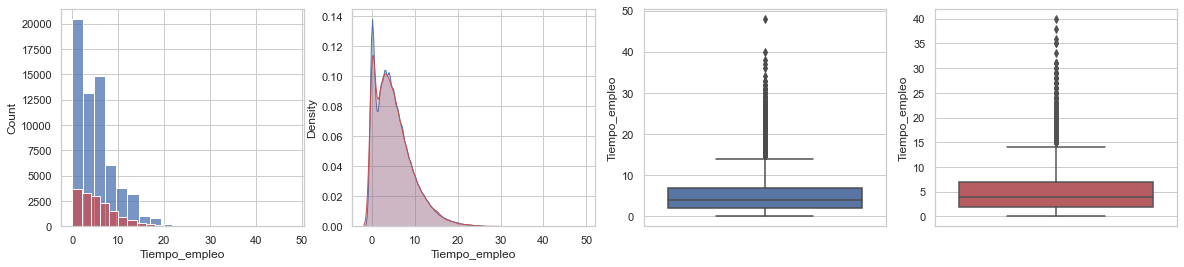

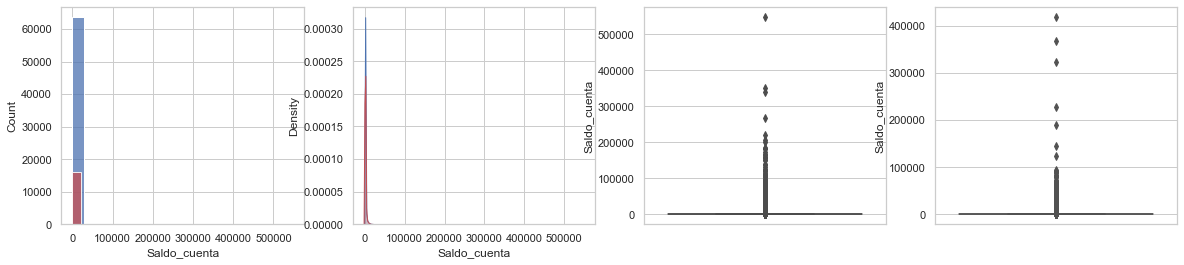

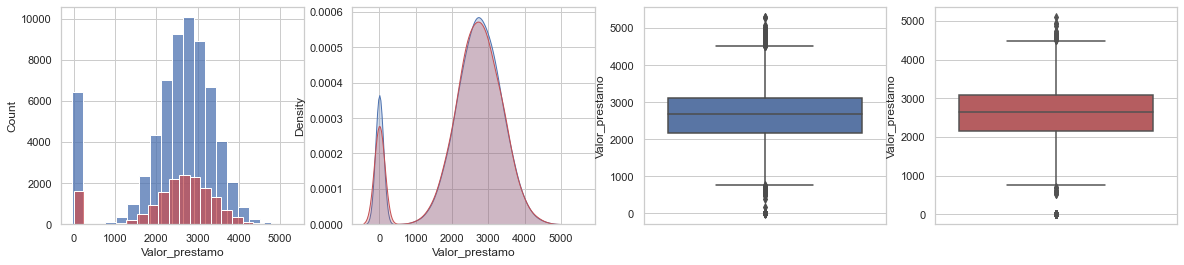

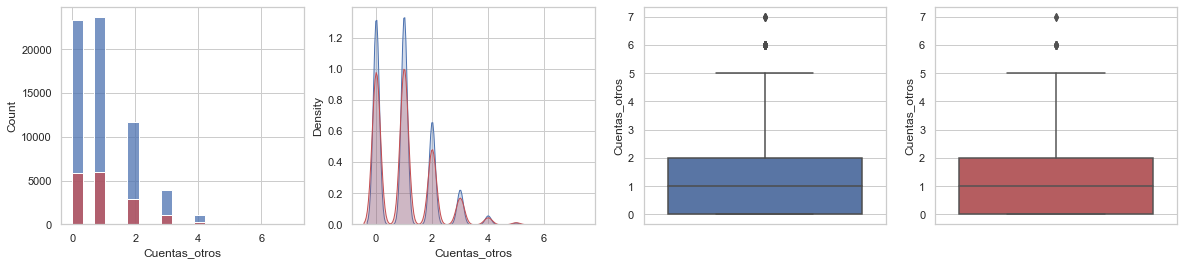

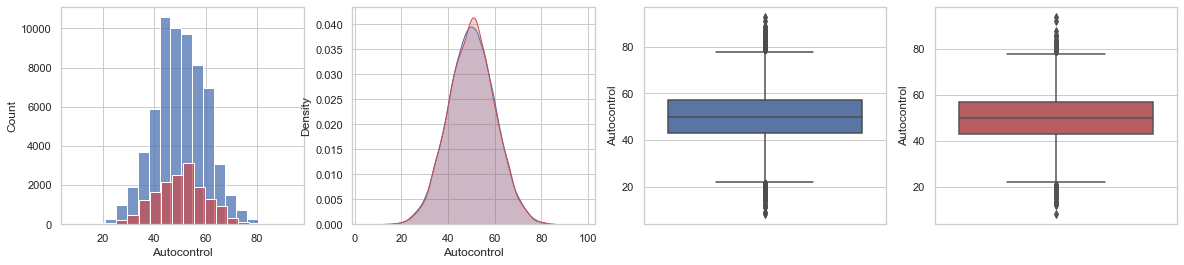

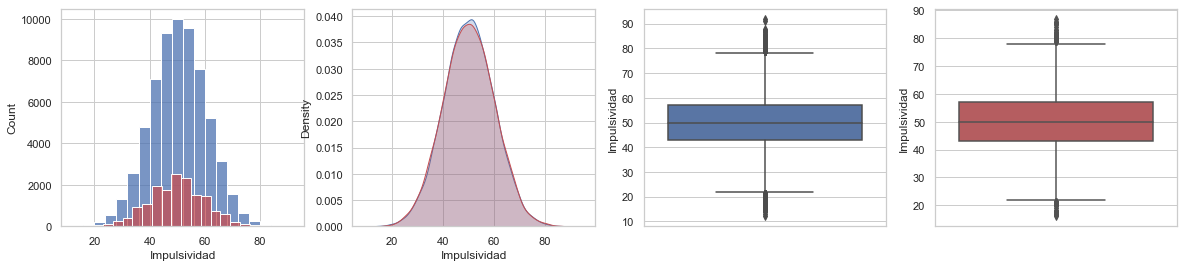

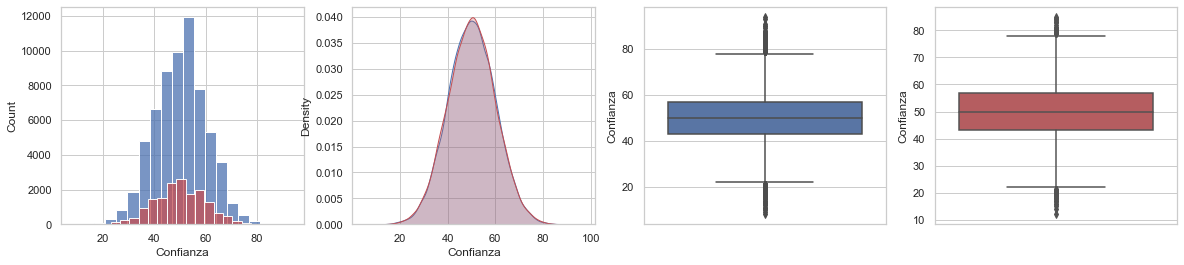

In [12]:
for col in cols_num:
    compare_var_train_test(train, test, col)

#### >>>> Cualitativos

In [13]:
display_horizontal(
    train.describe(include=[bool, object]).T, test.describe(include=[bool, object]).T
)

,count,unique,top,freq
id,63901,63901,67538,1
,count,unique,top,freq
id,16116,16116,67607,1


## >> Gráfico QQplot

////////////////////////////////////////////////// Tiempo_empleo


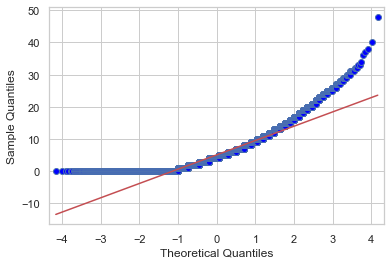

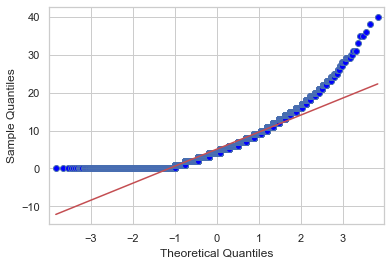

////////////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////// Saldo_cuenta


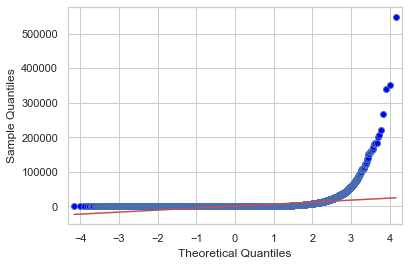

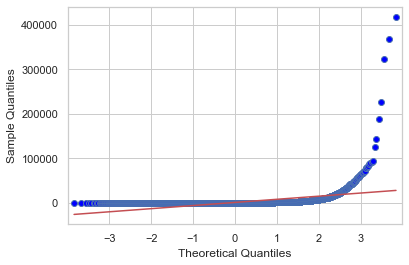

////////////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////// Valor_prestamo


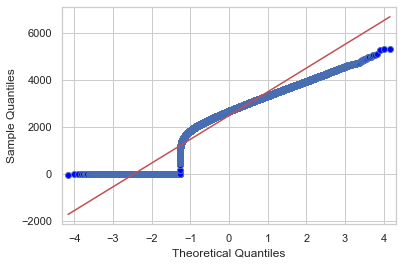

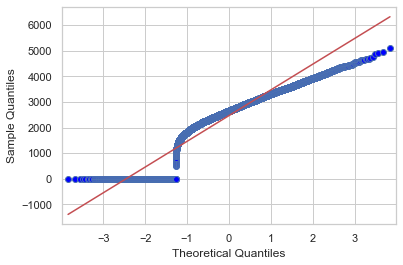

////////////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////// Cuentas_otros


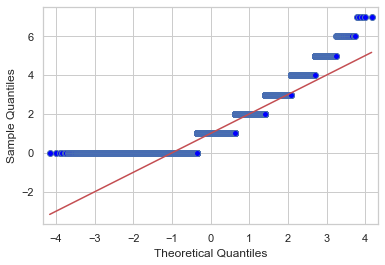

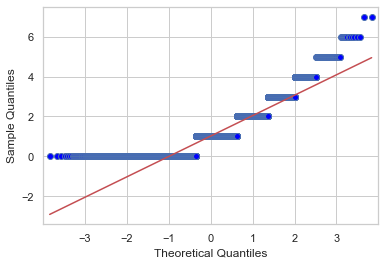

////////////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////// Autocontrol


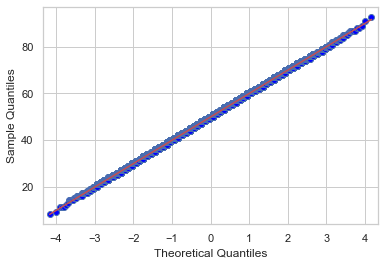

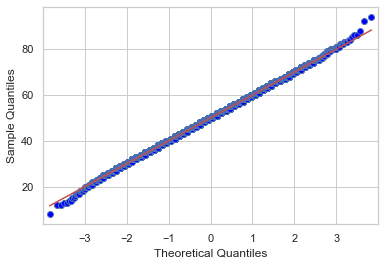

////////////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////// Impulsividad


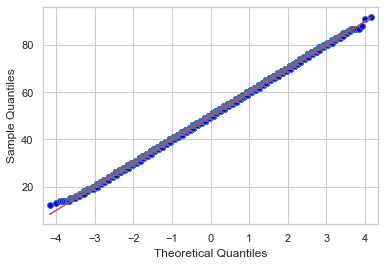

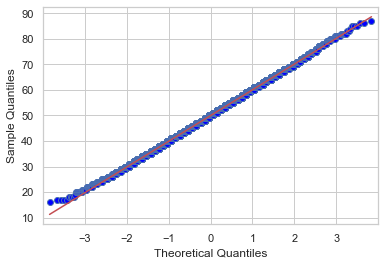

////////////////////////////////////////////////////////////////////////////////////////////////////
////////////////////////////////////////////////// Confianza


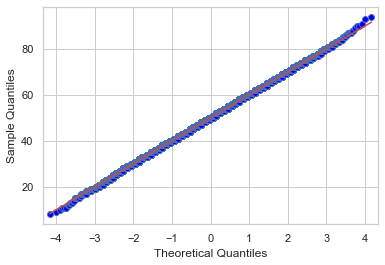

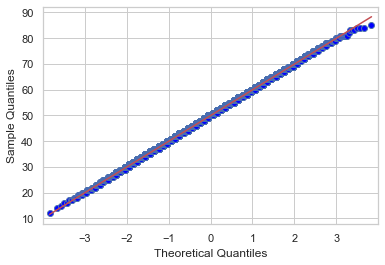

////////////////////////////////////////////////////////////////////////////////////////////////////


In [14]:
from statsmodels.graphics.gofplots import qqplot

for col in cols_num:
    print("/"*50, col)
    fig = qqplot(train[col] , line='s')
    fig2 = qqplot(test[col] , line='s')
    plt.show()
    print("/"*100)

## >> Pruebas de Normalidad

In [45]:
def test_normalidad(data, col, method='kolmogorov', alpha=0.05, tipo='train'):
    metodos_validos = ['shapiro', 'kolmogorov', 'agostino']
    
    if method not in metodos_validos:
        return 'Ingrese un método válido'
    
    if method == 'shapiro':
        stat, p = stats.shapiro(data[col])
    elif method == 'kolmogorov':
        ks = stats.kstest(data[col], 'norm')
        p = ks.pvalue
        stat = ks.statistic
    elif method == 'agostino':
        stat, p = stats.normaltest(data[col])
    
    if p > alpha:
        msg = 'NORMALIDAD - No hay evidencia para rechzar la hipotesis nula'
    else:
        msg = 'NO GAUSSIANO - Se rechaza la hipotesis nula - NO NORMAL'
    
    return pd.DataFrame({
        'Nombre de variable':  col,
        'Tipo de data': tipo,
        'Tamaño de la muestra': 'train: {}, test: {} '.format(train.shape[0], test.shape[0]),
        'valor del estadístico': stat,
        'p-valor': p,
        'Resultado': msg
    }, index=[0])

#### >>>> Shapiro 

In [47]:
pd.concat( 
    [test_normalidad(train, col, method='shapiro', tipo='train') for col in cols_num] + [test_normalidad(test, col, method='shapiro', tipo='test') for col in cols_num] , axis=0, ignore_index=True
).sort_values(by=['Nombre de variable'], ascending=False)

,Nombre de variable,Tipo de data,Tamaño de la muestra,valor del estadístico,p-valor,Resultado
2,Valor_prestamo,train,"train: 63901, test: 16116",0.868211,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
9,Valor_prestamo,test,"train: 63901, test: 16116",0.869136,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
0,Tiempo_empleo,train,"train: 63901, test: 16116",0.898591,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
7,Tiempo_empleo,test,"train: 63901, test: 16116",0.893868,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
1,Saldo_cuenta,train,"train: 63901, test: 16116",0.131857,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
8,Saldo_cuenta,test,"train: 63901, test: 16116",0.100939,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
5,Impulsividad,train,"train: 63901, test: 16116",0.999322,2.216399e-14,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
12,Impulsividad,test,"train: 63901, test: 16116",0.998960,1.379161e-08,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
3,Cuentas_otros,train,"train: 63901, test: 16116",0.833501,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
10,Cuentas_otros,test,"train: 63901, test: 16116",0.830989,0.000000e+00,NO GAUSSIANO - Se rechaza la hipotesis nula - ...


#### >>>>  Kolmogorov Smirnov

In [48]:
pd.concat( 
    [test_normalidad(train, col, method='kolmogorov', tipo='train') for col in cols_num] + [test_normalidad(test, col, method='kolmogorov', tipo='test') for col in cols_num] , axis=0, ignore_index=True
).sort_values(by=['Nombre de variable'], ascending=False)

,Nombre de variable,Tipo de data,Tamaño de la muestra,valor del estadístico,p-valor,Resultado
2,Valor_prestamo,train,"train: 63901, test: 16116",0.899188,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
9,Valor_prestamo,test,"train: 63901, test: 16116",0.898858,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
0,Tiempo_empleo,train,"train: 63901, test: 16116",0.751651,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
7,Tiempo_empleo,test,"train: 63901, test: 16116",0.750208,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
1,Saldo_cuenta,train,"train: 63901, test: 16116",0.974890,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
8,Saldo_cuenta,test,"train: 63901, test: 16116",0.975354,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
5,Impulsividad,train,"train: 63901, test: 16116",1.000000,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
12,Impulsividad,test,"train: 63901, test: 16116",1.000000,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
3,Cuentas_otros,train,"train: 63901, test: 16116",0.500000,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
10,Cuentas_otros,test,"train: 63901, test: 16116",0.500000,0.0,NO GAUSSIANO - Se rechaza la hipotesis nula - ...


#### >>>> Agostino

In [49]:
pd.concat( 
    [test_normalidad(train, col, method='agostino', tipo='train') for col in cols_num] + [test_normalidad(test, col, method='agostino', tipo='test') for col in cols_num] , axis=0, ignore_index=True
).sort_values(by=['Nombre de variable'], ascending=False)

,Nombre de variable,Tipo de data,Tamaño de la muestra,valor del estadístico,p-valor,Resultado
2,Valor_prestamo,train,"train: 63901, test: 16116",11516.196121,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
9,Valor_prestamo,test,"train: 63901, test: 16116",2879.088899,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
0,Tiempo_empleo,train,"train: 63901, test: 16116",14263.131960,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
7,Tiempo_empleo,test,"train: 63901, test: 16116",3991.001669,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
1,Saldo_cuenta,train,"train: 63901, test: 16116",172665.053320,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
8,Saldo_cuenta,test,"train: 63901, test: 16116",44020.376613,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
5,Impulsividad,train,"train: 63901, test: 16116",1.173941,0.556009,NORMALIDAD - No hay evidencia para rechzar la ...
12,Impulsividad,test,"train: 63901, test: 16116",5.529088,0.063005,NORMALIDAD - No hay evidencia para rechzar la ...
3,Cuentas_otros,train,"train: 63901, test: 16116",8751.021816,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...
10,Cuentas_otros,test,"train: 63901, test: 16116",2586.984968,0.000000,NO GAUSSIANO - Se rechaza la hipotesis nula - ...


## >> Pruebas de Homocedasticidad

In [36]:
def test_homocedasticidad(train, test, col, method='bartlett', alpha=0.05):
    metodos_validos = ['levene', 'bartlett', 'fligner']
    
    if method not in metodos_validos:
        return 'Ingrese un método válido'
    
    if method == 'levene':
        prueba = stats.levene(train[col], test[col], center='median')
    elif method == 'bartlett':
        prueba = stats.bartlett(train[col], test[col])
    elif method == 'fligner':
        prueba = stats.fligner(train[col], test[col], center='median')

    p = prueba.pvalue
    stat = prueba.statistic
    
    if p > alpha:
        msg = 'HOMOCEDASTICIDAD - No hay evidencia para rechzar la hipotesis nula'
    else:
        msg = 'HETEROCEDASTICIDAD - Se rechaza la hipotesis nula - NO NORMAL'
    
    return pd.DataFrame({
        'Nombre de variable':  col,
        'Tamaño de la muestra': 'train: {}, test: {} '.format(train.shape[0], test.shape[0]),
        'valor del estadístico': stat,
        'p-valor': p,
        'Resultado': msg
    }, index=[0])

#### >>>> Barlett

In [37]:
pd.concat( 
    [test_homocedasticidad(train, test, col, method='bartlett') for col in cols_num], axis=0, ignore_index=True
)

,Nombre de variable,Tamaño de la muestra,valor del estadístico,p-valor,Resultado
0,Tiempo_empleo,"train: 63901, test: 16116",1.612310,2.041674e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
1,Saldo_cuenta,"train: 63901, test: 16116",1082.685713,1.914578e-237,HETEROCEDASTICIDAD - Se rechaza la hipotesis n...
2,Valor_prestamo,"train: 63901, test: 16116",0.083383,7.727639e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
3,Cuentas_otros,"train: 63901, test: 16116",13.974997,1.852579e-04,HETEROCEDASTICIDAD - Se rechaza la hipotesis n...
4,Autocontrol,"train: 63901, test: 16116",2.544819,1.106566e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
5,Impulsividad,"train: 63901, test: 16116",0.724656,3.946208e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
6,Confianza,"train: 63901, test: 16116",0.019911,8.877864e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...


#### >>>> Levene

In [39]:
pd.concat( 
    [test_homocedasticidad(train, test, col, method='levene') for col in cols_num], axis=0, ignore_index=True
)

,Nombre de variable,Tamaño de la muestra,valor del estadístico,p-valor,Resultado
0,Tiempo_empleo,"train: 63901, test: 16116",0.234873,0.627935,HOMOCEDASTICIDAD - No hay evidencia para rechz...
1,Saldo_cuenta,"train: 63901, test: 16116",0.327388,0.567203,HOMOCEDASTICIDAD - No hay evidencia para rechz...
2,Valor_prestamo,"train: 63901, test: 16116",0.002332,0.961484,HOMOCEDASTICIDAD - No hay evidencia para rechz...
3,Cuentas_otros,"train: 63901, test: 16116",2.197305,0.138256,HOMOCEDASTICIDAD - No hay evidencia para rechz...
4,Autocontrol,"train: 63901, test: 16116",4.549158,0.032938,HETEROCEDASTICIDAD - Se rechaza la hipotesis n...
5,Impulsividad,"train: 63901, test: 16116",1.623600,0.202594,HOMOCEDASTICIDAD - No hay evidencia para rechz...
6,Confianza,"train: 63901, test: 16116",0.094557,0.758463,HOMOCEDASTICIDAD - No hay evidencia para rechz...


#### >>>> Fligner

In [40]:
pd.concat( 
    [test_homocedasticidad(train, test, col, method='fligner') for col in cols_num], axis=0, ignore_index=True
)

,Nombre de variable,Tamaño de la muestra,valor del estadístico,p-valor,Resultado
0,Tiempo_empleo,"train: 63901, test: 16116",0.151197,6.973942e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
1,Saldo_cuenta,"train: 63901, test: 16116",12.787828,3.488820e-04,HETEROCEDASTICIDAD - Se rechaza la hipotesis n...
2,Valor_prestamo,"train: 63901, test: 16116",47.828332,4.652204e-12,HETEROCEDASTICIDAD - Se rechaza la hipotesis n...
3,Cuentas_otros,"train: 63901, test: 16116",2.266147,1.322283e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
4,Autocontrol,"train: 63901, test: 16116",4.565989,3.261284e-02,HETEROCEDASTICIDAD - Se rechaza la hipotesis n...
5,Impulsividad,"train: 63901, test: 16116",1.614713,2.038306e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...
6,Confianza,"train: 63901, test: 16116",0.089894,7.643121e-01,HOMOCEDASTICIDAD - No hay evidencia para rechz...


### Información de versionaiento

In [22]:
!pip install sinfo

  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7907 sha256=5e18a4d088336d284c9df303c8840f5268f09f1cab6e0a00f426adab8128cbc5
  Stored in directory: c:\users\villacorta\appdata\local\pip\cache\wheels\0e\63\be\1333921ddb5d249efe6db671c36608e46593e018994c3be11d
Successfully built sinfo


In [38]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.4.2
numpy       1.20.1
pandas      1.1.3
scipy       1.6.2
seaborn     0.11.1
sinfo       0.3.4
statsmodels 0.12.2
-----
IPython             7.22.0
jupyter_client      6.1.12
jupyter_core        4.7.1
jupyterlab          3.0.14
notebook            6.3.0
-----
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
8 logical CPU cores, Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
-----
Session information updated at 2021-05-08 10:47
